<h1><center>PART A</center></h1>

### 1) Import numpy, pandas, seaborn, matplotlib

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### 2) Load the data and view a 2% random sample of the data

In [87]:
df=pd.read_csv('heart.csv')
df.sample(frac=0.02)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0


### EDA

In [88]:
# Dimensions 
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


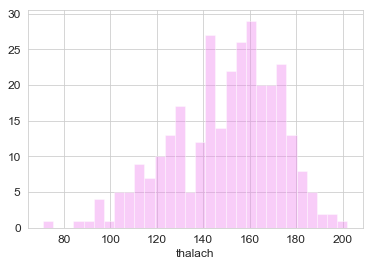

In [89]:
sns.set_style('whitegrid')

#Distribution of Maximum Heart Rate
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')


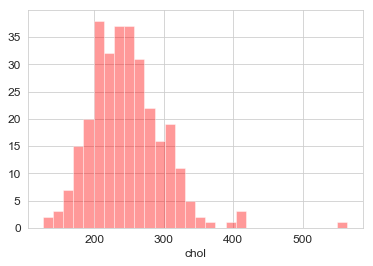

In [90]:
# serum cholestoral in mg/dl
sns.distplot(df['chol'],kde=False,bins=30,color='red')

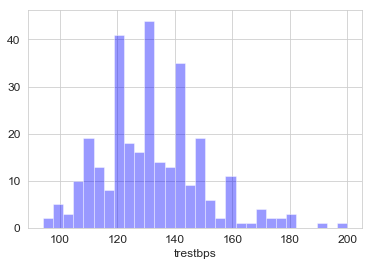

In [91]:
# resting blood pressure (in mm Hg on admission to the hospital)
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')


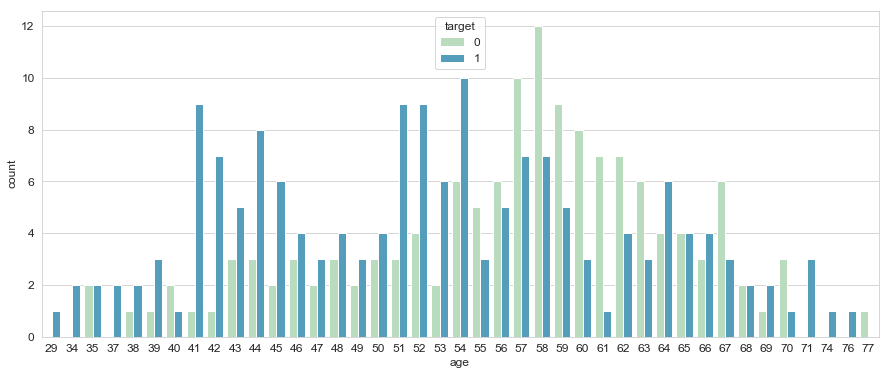

In [92]:
# 4 people who have heart disease according to age
plt.figure(figsize=(15,6))

sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')

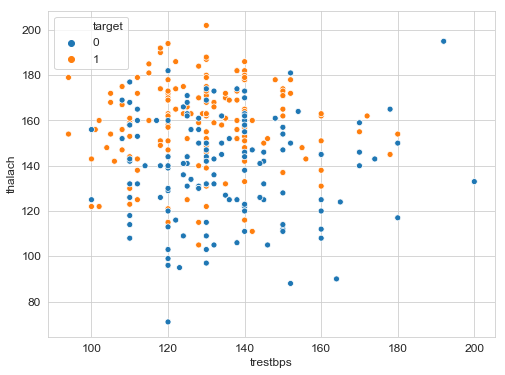

In [93]:
# 5 Scatter plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

### 3) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test

In [94]:
from sklearn.model_selection import train_test_split

#set up data
X=df.drop(['target'],axis=1)
y=df['target']
#split data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

X_train=X_train.copy()
X_test=X_test.copy()
y_train=y_train.copy()
y_test=y_test.copy()

### 4) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [95]:
numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

### 5) Get basic stats on Xtrain (such as count, mean, std, etc)

In [96]:
X_train.describe()
X_train.shape

(212, 13)

### 6) Check if there are any NaNs in any of the columns in Xtrain

In [97]:
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### 7) Create an annotated heatmap of the correlation between the numeric features in Xtrain

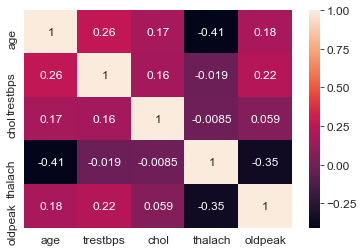

In [99]:
# your code here
corr=X_train[numeric_features].corr()

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

### 8) Standard Scale all of the numeric features in Xtrain, include transformed numeric features in Xtrain, and drop original numeric features in Xtrain

In [100]:
# your code here
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xcat=pd.DataFrame(ss.fit_transform(X_train[numeric_features]), index=X_train.index, columns=['scale_'+x for x in numeric_features])
X_train= pd.concat([X_train,Xcat],axis=1)
X_train= X_train.drop(numeric_features,axis=1)
X_train.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,sex,cp,fbs,restecg,exang,slope,ca,thal,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak
34,1,3,0,0,1,2,1,2,-0.334915,-0.332611,-0.655815,-1.074173,0.356309
185,1,0,0,0,0,2,1,2,-1.097207,-1.071867,1.000106,0.121905,-0.931786
187,1,0,0,0,1,1,1,3,-0.008219,-0.389477,0.483975,-1.757646,1.092364
147,0,3,0,1,0,2,0,2,0.645174,1.089034,-0.075168,0.890812,-0.103725
202,1,0,0,0,1,2,0,3,0.427376,1.089034,0.569996,-1.672212,-0.195731


In [101]:
# leave this cell blank

### 9) OneHotEncode all of the categorical features in Xtrain, include transformed categorical features in Xtrain, and drop original categorical features in Xtrain

In [102]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore')
Xcat=pd.DataFrame(ohe.fit_transform(X_train[categorical_features]), columns=ohe.get_feature_names(),index=X_train.index)
X_train=pd.concat([X_train,Xcat],axis=1)
X_train=X_train.drop(categorical_features,axis=1)
X_train.head()

,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak,x0_0,x0_1,x1_0,x1_1,x1_2,...,x5_2,x6_0,x6_1,x6_2,x6_3,x6_4,x7_0,x7_1,x7_2,x7_3
34,-0.334915,-0.332611,-0.655815,-1.074173,0.356309,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
185,-1.097207,-1.071867,1.000106,0.121905,-0.931786,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
187,-0.008219,-0.389477,0.483975,-1.757646,1.092364,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
147,0.645174,1.089034,-0.075168,0.890812,-0.103725,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
202,0.427376,1.089034,0.569996,-1.672212,-0.195731,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1


### 10) Fit a Logistic Regression Model to training data with random_state=1

In [103]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto',class_weight=None,max_iter=100)
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### 11) Standard Scale all of the numeric features in Xtest, include transformed numeric features in Xtest, and drop original numeric features in Xtest

In [104]:
Xcat=pd.DataFrame(ss.transform(X_test[numeric_features]),index=X_test.index, columns=['scale_'+x for x in numeric_features])
X_test= pd.concat([X_test,Xcat],axis=1)
X_test= X_test.drop(numeric_features,axis=1)
X_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,sex,cp,fbs,restecg,exang,slope,ca,thal,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak
204,0,0,0,0,0,0,3,3,0.862972,1.657692,-1.709583,-0.219832,4.772635
159,1,1,0,0,0,2,0,3,0.209579,-0.048282,-0.483772,0.549075,-0.931786
219,1,0,1,0,1,2,2,3,-0.661612,-0.048282,0.268920,-0.006246,-0.931786
174,1,0,0,0,1,1,2,3,0.645174,-0.048282,-0.806354,-0.775153,1.276377
184,1,0,0,0,0,1,0,3,-0.443814,1.089034,-0.010651,-0.946022,1.460391


### 12) OneHotEncode all of the categorical features in Xtest, include transformed categorical features in Xtest, and drop original categorical features in Xtest

In [105]:

Xcat=pd.DataFrame(ohe.transform(X_test[categorical_features]),columns=ohe.get_feature_names(), index=X_test.index)
X_test=pd.concat([X_test,Xcat],axis=1)
X_test=X_test.drop(categorical_features,axis=1)
X_test.head()

,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak,x0_0,x0_1,x1_0,x1_1,x1_2,...,x5_2,x6_0,x6_1,x6_2,x6_3,x6_4,x7_0,x7_1,x7_2,x7_3
204,0.862972,1.657692,-1.709583,-0.219832,4.772635,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
159,0.209579,-0.048282,-0.483772,0.549075,-0.931786,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
219,-0.661612,-0.048282,0.268920,-0.006246,-0.931786,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
174,0.645174,-0.048282,-0.806354,-0.775153,1.276377,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
184,-0.443814,1.089034,-0.010651,-0.946022,1.460391,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


### 13) Predict and Evaluate Logisitic Regression Model on Xtest

In [106]:
y_pred=log.predict(X_test)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



# KNN- Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)


### Confusion Matrix

In [141]:
# evaluation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,prediction))
print(metrics.classification_report(y_test,prediction))



Accuracy: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



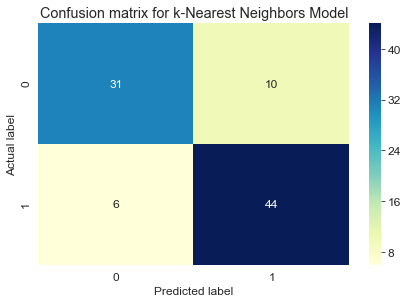

In [142]:

from sklearn import metrics


#create a heat map &

cf_matrix=metrics.confusion_matrix(y_test,prediction)
sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


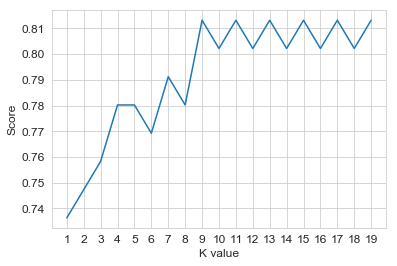

Maximum KNN Score is 81.32%


In [110]:
# try ro find best k value
import matplotlib.pyplot as plt

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))


### ROC Curve

In [146]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predictions from the model
prediction = knn.predict(X_test)

#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,prediction)



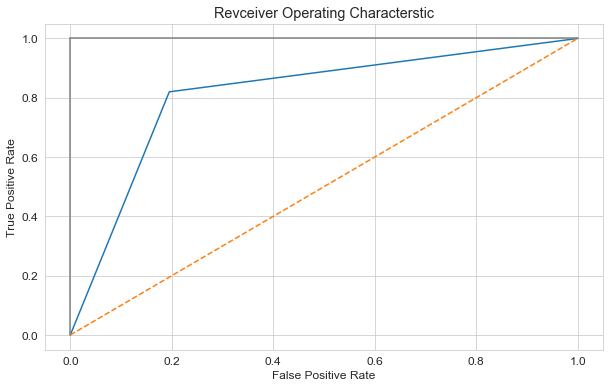

In [147]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [148]:
#Calculate area under the curve
roc_auc_score(y_test,y_pred)

0.7980487804878048

In [143]:
 # Random Forest
# Visualize from Decision Tree

from sklearn.tree import export_graphviz #plot tree

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

# Extract single tree
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

# Export as dot file
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook

from IPython.display import Image
Image(filename = 'tree.png')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

## SVM 

In [149]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
prediction=svm.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [150]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))


0.8241758241758241
[[31 10]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [151]:
# Model Comparison

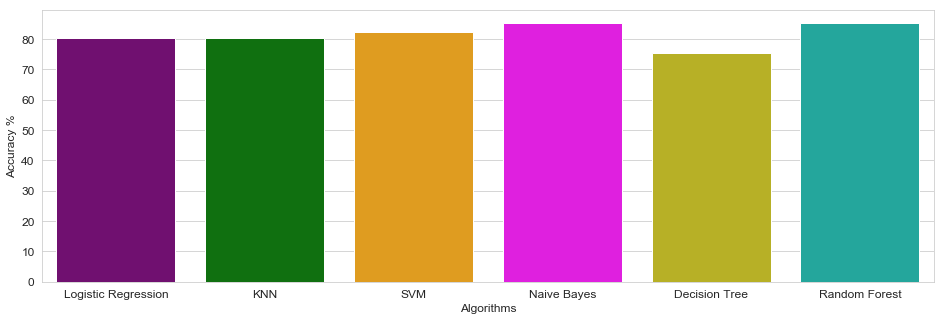

In [152]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [80.21, 80.16, 82.4, 85.25, 75.41, 85.25]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

<h1><center>Part B - Create Pipeline</center></h1> 

### 14) (a) Read heart.csv file into a dataframe called df; (b) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1; (c) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)|

In [154]:
#a)
df=pd.read_csv('heart.csv')

#b)
#set up data
X=df.drop(['target'],axis=1)
y=df['target']
#split data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

X_train=X_train.copy()
X_test=X_test.copy()
y_train=y_train.copy()
y_test=y_test.copy()

#c):
numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

### 15) Create a pipeline called "numeric_transformer" with a StandardScaler step called "ss" (use the same parameters used in Part A above)

In [155]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


numeric_transformer=Pipeline(steps=[
    ('ss',StandardScaler())])

### 16) Create a pipeline called "categorical_transformer" with a OneHotEncoder step called "ohe" (use the same parameters used in Part A above)

In [156]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer=Pipeline(steps=[
    ('ohe',OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore'))
])

### 17) Create a column transformer called "preprocessor" with two transformers: (a) the first transformer called "num" which uses the numeric_transformer (that you defined above) on the numeric_features; and (b) the second transformer called "cat" which uses the categorical_transformer (defined above) on the categorical_features

In [157]:


from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
transformers=[
    ('nums',numeric_transformer, numeric_features),
    ('cat', categorical_transformer,categorical_features)
])


### 18) Create a pipeline called "clf" with two steps: (a) the first step called "pp" which invokes the preprocessor  defined above; and (b) the second step called "lr" which involkes a logisitc regression model  (use the same parameters  used in Part A above)

In [158]:
from sklearn.linear_model import LogisticRegression

clf= Pipeline(steps=[
    ('pp',preprocessor),
    ('lr',LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto',class_weight=None,max_iter=100))
])

### 19) Fit the clf pipeline to the training data

In [159]:
clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('pp', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('nums', Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'thalach', 'oldpea..., penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

### 20) Predict and Evaluate clf pipeline on Xtest (should end up with same results as in Part A above)

In [160]:
y_pred=clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [161]:
# leave this cell blank